### Курсовой проект "Выбор репетитора"

### Предобработка данных

**Подключение библиотек**

In [456]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Пути к файлам**

In [457]:
DATASET_PATH = 'train.csv'
PREPARED_DATASET_PATH = 'train_prepared.csv'
TEST_DATASET_PATH = 'test.csv'

**Загрузка данных**

In [458]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


**Форма массива**

In [459]:
df.shape

(10000, 13)

**Общая информация о массиве**

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


**Cтатистические характеристики по столбцам с числовыми значениями**

In [461]:
round(df.describe(),1)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4999.5,45.8,2.0,1702.4,1.7,0.4,0.1,0.1,0.1,0.0,0.0,64.4,0.1
std,2886.9,8.0,1.8,523.8,0.8,0.5,0.3,0.3,0.2,0.2,0.1,13.6,0.3
min,0.0,23.0,0.0,200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0
25%,2499.8,40.0,0.0,1300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
50%,4999.5,46.0,2.0,1550.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0
75%,7499.2,51.0,3.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0
max,9999.0,68.0,9.0,3950.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,1.0


**Разделим train на целевую переменную и фичи**

In [462]:
X = df.drop('choose', axis=1)
y = df[['choose']]

**Подготовка для предсказанной целевой переменной**

In [463]:
df_test = pd.read_csv(TEST_DATASET_PATH)
preds_final = pd.DataFrame()
preds_final['Id'] = df_test['Id'].copy()

**Назначим индексы датасета по столбцу Id**

In [464]:
X.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

In [465]:
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0


**Форма массива на тестовых данных**

In [466]:
df_test.shape

(10000, 11)


### Выбросы

**Age**

In [467]:
X['age'].value_counts()

44.0    491
43.0    485
48.0    482
45.0    474
47.0    470
42.0    469
46.0    466
49.0    443
50.0    430
51.0    411
40.0    408
41.0    391
39.0    367
52.0    359
53.0    333
38.0    311
54.0    307
37.0    270
55.0    249
36.0    239
56.0    210
35.0    191
57.0    190
34.0    165
33.0    158
58.0    153
59.0    133
32.0    127
60.0    105
31.0     92
61.0     80
62.0     68
30.0     66
63.0     56
28.0     49
64.0     46
29.0     46
68.0     38
27.0     35
65.0     31
66.0     24
23.0     21
26.0     21
25.0     17
67.0     14
24.0      9
Name: age, dtype: int64

**years_of_experience**

In [468]:
X['years_of_experience'].value_counts()

0.0    2774
1.0    1842
2.0    1743
3.0    1545
4.0    1177
5.0     581
6.0     234
7.0      73
8.0      22
9.0       9
Name: years_of_experience, dtype: int64

**lesson_price**

In [469]:
X['lesson_price'].value_counts().sort_values().head(50)
# > 3349
# < 601

450.0       1
3650.0      1
3950.0      1
3700.0      2
200.0       2
3750.0      2
600.0       2
400.0       2
3600.0      3
500.0       3
3500.0      3
350.0       4
3450.0      5
3350.0      7
550.0       7
3400.0      7
3550.0      8
650.0      13
3200.0     15
750.0      15
3300.0     16
3250.0     17
700.0      18
3150.0     18
800.0      26
3000.0     31
3050.0     32
2950.0     33
850.0      36
900.0      38
3100.0     40
2900.0     54
2850.0     60
950.0      66
2450.0     69
2500.0     70
2800.0     74
2700.0     74
2600.0     76
1950.0     76
2550.0     77
1000.0     78
2750.0     82
2650.0     87
2400.0     89
1900.0     91
2000.0    103
2050.0    112
1850.0    124
1050.0    127
Name: lesson_price, dtype: int64

**qualification**

In [470]:
X['qualification'].value_counts()

1.0    4891
2.0    3033
3.0    2018
4.0      58
Name: qualification, dtype: int64

**mean_exam_points**

In [471]:
X['mean_exam_points'].value_counts().sort_values().head(50)


100.0      1
99.0       1
98.0       3
33.0       6
97.0      10
96.0      14
95.0      20
35.0      23
34.0      23
94.0      31
93.0      33
36.0      42
92.0      47
38.0      60
37.0      62
91.0      62
39.0      71
44.0      78
42.0      79
40.0      79
41.0      83
90.0      83
46.0      89
79.0     106
89.0     106
43.0     107
48.0     111
45.0     114
76.0     116
77.0     117
47.0     123
78.0     130
86.0     132
80.0     132
82.0     137
75.0     140
49.0     147
84.0     148
87.0     149
81.0     152
88.0     152
74.0     155
73.0     157
72.0     162
83.0     167
85.0     176
52.0     192
71.0     192
50.0     196
51.0     212
Name: mean_exam_points, dtype: int64

**physics**

In [472]:
X['physics'].value_counts()

0.0    6294
1.0    3706
Name: physics, dtype: int64

**chemistry**

In [473]:
X['chemistry'].value_counts()

0.0    8785
1.0    1215
Name: chemistry, dtype: int64

**biology**

In [474]:
X['biology'].value_counts()

0.0    8828
1.0    1172
Name: biology, dtype: int64

**english**

In [475]:
X['english'].value_counts()

0.0    9409
1.0     591
Name: english, dtype: int64

**geography**

In [476]:
X['geography'].value_counts()

0.0    9723
1.0     277
Name: geography, dtype: int64

**history**	

In [477]:
X['history'].value_counts()

0.0    9820
1.0     180
Name: history, dtype: int64

### Гистограммы количественных признаков

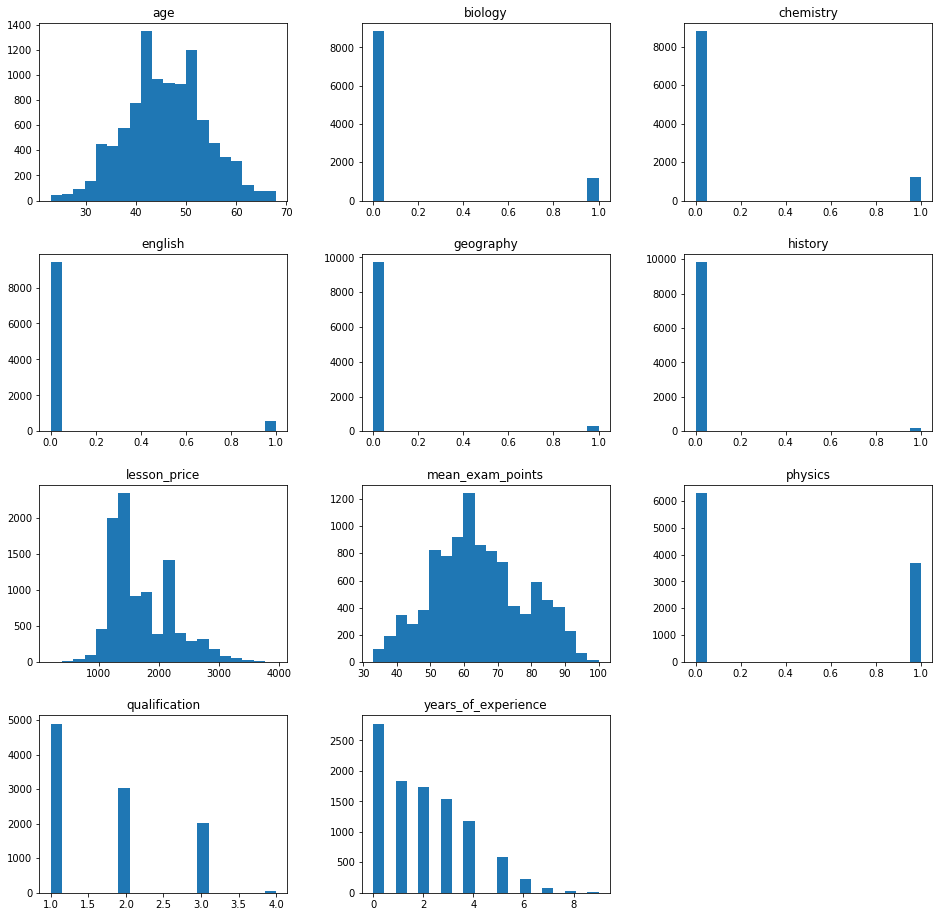

In [478]:
df_num_features = X.select_dtypes(include=['float64', 'int64'])
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

### Преобразование данных

In [479]:
class FeatureImputer:
    'Обработка выбросов'
    
    def __init__(self):
        self.medians=None
        
    def fit(self, X):
        self.medians = X.median()
    
    def transform(self, X):
        
        
        # english
        if 'english' in X.columns:
            X.drop('english', axis=1, inplace=True)
            
        # geography
        if 'geography' in X.columns:
            X.drop('geography', axis=1, inplace=True)
        
        # history
        if 'history' in X.columns:
            X.drop('history', axis=1, inplace=True)
            
   
        
        
        
            
       
        
        return X

**Применим очистку данных к train и test выборкам**

In [480]:
imputer = FeatureImputer()

imputer.fit(X)

X = imputer.transform(X)
df_test = imputer.transform(df_test)

In [481]:
X.shape

(10000, 8)

In [482]:
df_test.shape

(10000, 8)

### Построение модели логистической регрессии

In [483]:
# отмасштабируем признаки методом стандартизации
def std(X):
    
    means = X.mean(axis=0)
    stds = X.std(axis=0)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X.iloc[i, j] = (X.iloc[i, j] - means[j])/stds[j]

In [484]:
std(X)

In [485]:
std(df_test)

In [486]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X.iloc[shuffle_index], y.iloc[shuffle_index]

# разбиваем выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3)

In [487]:
y_train_ = y_train.to_numpy()


In [500]:
# транспонируем данные в строки
X_train_tr = X_train.transpose().to_numpy()
y_train_tr = y_train.transpose().to_numpy()
X_test_tr = X_test.transpose().to_numpy()
y_test_tr = y_test.transpose().to_numpy()
df_test_tr = df_test.transpose().to_numpy()

In [489]:
#реализуем функцию потерь log loss с одновременным расчетом градиента
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X)) # вероятность отнесения объекта к классу "+1"
    
    # loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = -1.0 / m * np.log(1 + np.exp(np.dot(w.T, X)))
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [490]:
#реализуем градиентный спуск
def optimize(w, X, y, n_iterations, eta):
#потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [491]:
#реализуем функцию для выполнения предсказаний
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted 

In [492]:
#Расчет вероятности
def predict_proba(w, X):  
    A = sigmoid(np.dot(w.T, X))
    return A

In [493]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

### ROC-AUC

In [494]:
proba_test = (predict_proba(w, X_test_tr))[0]
proba_train = (predict_proba(w, X_train_tr))[0]

In [495]:
#матрица ошибок
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [496]:
def roc_auc(proba, y):
    TPR = []
    FPR = []
    for p in np.unique(proba)[::-1]:
        curr_pred = (proba > p).astype(int)
        confusion_fixed = confusion(curr_pred, y)
        tpr = confusion_fixed['TP'] / (confusion_fixed['TP'] + confusion_fixed['FN'])
        fpr = 1 - confusion_fixed['TN'] / (confusion_fixed['TN'] + confusion_fixed['FP'])
        TPR.append(tpr)
        FPR.append(fpr)
    TPR.append(1)
    FPR.append(1)
    return TPR, FPR

In [497]:
def roc_auc_plot(proba, y):
    tpr = np.array(roc_auc(proba, y)[0])
    fpr = np.array(roc_auc(proba, y)[1])
    ROC_AUC = np.sum(0.5*(fpr[1:]-fpr[:-1])*(tpr[1:]+tpr[:-1]))

    plt.title('ROC curve')
    plt.ylim(0, 1.05)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend(' ', title=f'ROC-AUC ={ROC_AUC:.3f}', loc='lower right')
    plt.plot(fpr, tpr)

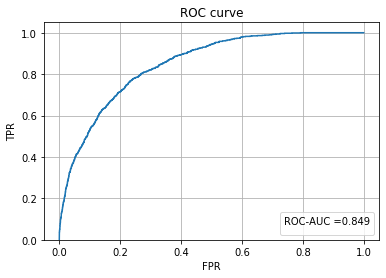

In [498]:
roc_auc_plot(proba_train, y_train_tr)

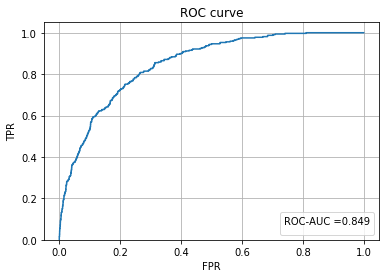

In [499]:
roc_auc_plot(proba_test, y_test_tr)

In [501]:
y_pred_final = predict(w, df_test_tr)

In [505]:
y_pred_final.flatten()

array([0., 1., 0., ..., 1., 1., 1.])

In [507]:
preds_final['choose'] = y_pred_final.flatten()
preds_final.to_csv('predictions.csv', index=False)